ДОМАШНЯЯ РАБОТА №5

Задание 2

Ходыка Анна

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import leastsq, curve_fit, minimize_scalar


In [6]:
alpha=0.5 #коэффициент заболеваемости
beta = 0.3 #коэффициент выздоровления
N=1000000
S0=990000
I0 = 7000
R0 = 3000
t0=0
tf=25

Решить дифференциальное уравнение (2) и построить график функции S(t)S(t)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001A0EBA36520>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


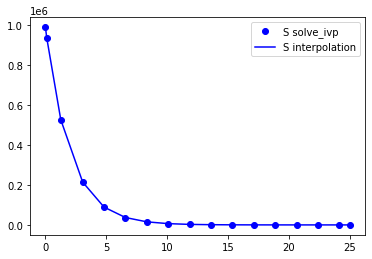

In [8]:
def dSdt(t, S):
    return -1*alpha*S

S_soln = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(S_soln)

t, S = S_soln.t, S_soln.y[0]
S_interp, = S_soln.sol(t)

plt.plot(t, S, 'o', color='b', label='S solve_ivp')
plt.plot(t, S_interp, color='blue', label='S interpolation')
plt.legend()
plt.show()

Mетодом наименьших квадратов для набора данных графика функции S(t)S(t) получить уравнение вида S(t)=S_0e^{-\alpha t}S(t)=S 
0*e**−αt

In [9]:
t, S

(array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
         6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
        15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
        24.15098721, 25.        ]),
 array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]))

In [10]:
def S_func(t, S_koef, alpha_koef):
    return S_koef*np.exp(-alpha_koef*t)

def diff(p, S, t):
    S_koef, alpha_koef = p
    return S - S_func(t, S_koef, alpha_koef)

In [11]:
p0 = (900000, 0.4)
aprx, _ = leastsq(diff, p0, args=(S, t))
aprx

array([9.89978640e+05, 4.99856001e-01])

ОТВЕТ

S(t)=9.89978640e+05 * np.exp(-4.99856001e-01 * t)

ПРОВЕРКА:

In [12]:
St=9.89978640e+05 * np.exp(-4.99856001e-01 * t)
St-S

array([-2.13600000e+01, -4.70628065e+00,  7.15306780e+01, -3.66030577e+01,
       -3.52699574e+01, -2.31512237e+01, -1.31440494e+01, -6.92530302e+00,
       -3.48545638e+00, -1.70071357e+00, -8.11515292e-01, -3.80737824e-01,
       -1.76284728e-01, -8.07585370e-02, -3.66750980e-02, -1.65342508e-02,
       -1.03741717e-02])

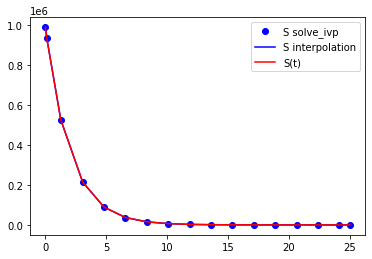

In [13]:
plt.plot(t, S, 'o', color='b', label='S solve_ivp')
plt.plot(t, S_interp, color='blue', label='S interpolation')
plt.plot(t, St, color='red', label='S(t)')
plt.legend()
plt.show()

Решить дифференциальное уравнение (3) и построить график функции I(t)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001A0EC2B09A0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08334945, 446699.01195032, 319077.83026358,
        165571.99129925,  71966.74863389,  29712.58392708,
         12130.57394067,   5009.75291427,   2075.26330119,
          1367.85128541]])
 y_events: None


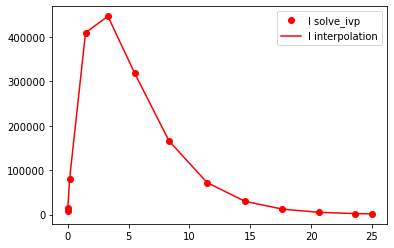

In [14]:
def dIdt(t, I):
    return alpha*S_soln.sol(t) - beta*I

I_soln = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True)
print(I_soln)

t, I = I_soln.t, I_soln.y[0]
I_inetrp, = I_soln.sol(t)

# I -  зараженные индивиды (infected)
plt.plot(t, I, 'o', color='r', label='I solve_ivp')
plt.plot(t, I_inetrp, color='red', label='I interpolation')

plt.legend()
plt.show()

методом наименших квадратов для набора данных графика функции I(t) получить уравнение вида I(t)=(I_0+\alpha S_0t)e^{-\alpha t}I(t)

In [15]:
t, I

(array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
        3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
        1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
        2.50000000e+01]),
 array([  7000.        ,  13960.24492701,  79326.36974353, 409578.08334945,
        446699.01195032, 319077.83026358, 165571.99129925,  71966.74863389,
         29712.58392708,  12130.57394067,   5009.75291427,   2075.26330119,
          1367.85128541]))

In [18]:
def I_func(t, S_koef, I_koef, alpha_koef):
    return (I_koef + alpha_koef*S_koef*t)*np.exp((-1)*alpha_koef*t)

def diff_I(p, I, t):
    S_koef, I_koef, alpha_koef = p
    return I - I_func(t, S_koef, I_koef, alpha_koef)

In [19]:
p0 = (980000, 7100, 0.49)
aprx, _ = leastsq(diff_I, p0, args=(I, t))
aprx

array([1.25281252e+06, 8.08519852e+03, 3.83762945e-01])

In [24]:
# ту же задачу решаем с помощью функции curve_fit
result = curve_fit(I_func, t, I, p0)
result

(array([1.25281252e+06, 8.08519845e+03, 3.83762945e-01]),
 array([[ 3.13025751e+07, -3.86109416e+06,  4.67865872e+00],
        [-3.86109416e+06,  2.56030004e+06, -7.27639726e-01],
        [ 4.67865872e+00, -7.27639726e-01,  3.36741576e-06]]))

ОТВЕТ

I(t)= (8.08519852e+03 + 3.83762945e-01 * 1.25281252e+06 * t)*np.exp((-1)* 3.83762945e-01 *t)

ПРОВЕРКА:

In [27]:
It=(8.08519852e+03 + 3.83762945e-01 * 1.25281252e+06 * t)*np.exp((-1) * 3.83762945e-01 *t)

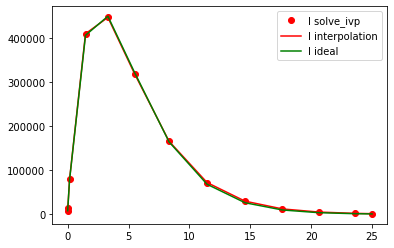

In [28]:
plt.plot(t, I, 'o', color='r', label='I solve_ivp')
plt.plot(t, I_inetrp, color='red', label='I interpolation')
plt.plot(t, It, color='green', label='I ideal')

plt.legend()
plt.show()

Построить все три графика S(t)S(t), I(t)I(t) и R(t)R(t) на одной области отображения полученные методом наименьших квадратов

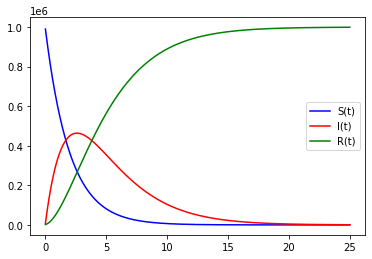

In [30]:
time=np.linspace(0, 25, num=1000)
def S_t(t):
    return 9.89978640e+05 * np.exp(-4.99856001e-01 * t)
def I_t(t):
    return (8.08519852e+03 + 3.83762945e-01 * 1.25281252e+06 * t)*np.exp((-1) * 3.83762945e-01 *t)
def R_t(t):
    return N-S_t(t)-I_t(t)

plt.plot(time, S_t(time), color='blue', label='S(t)')
plt.plot(time, I_t(time), color='red', label='I(t)')
plt.plot(time, R_t(time), color='green', label='R(t)')

plt.legend()
plt.show()

Найти время t_{max} при котором число инфекционных индивидов максимально. Надо с помощью метода minimize_scalar найти когда функция I(t) достигает своего максимума.

In [39]:
def I_t_conv(t):
    return -I_t(t)
result = minimize_scalar(I_t_conv, bounds=(0, 5))
result.x

2.588958560012167

Найдем максимум функции I(t) где alpha=0.5, S0=990000, I0=7000

In [40]:
def I_func(t, S_koef, I_koef, alpha_koef):
    return (I_koef + alpha_koef*S_koef*t)*np.exp((-1)*alpha_koef*t)

def I_t2_conv(t):
    return -I_func(t, S0, I0, alpha)
result = minimize_scalar(I_t2_conv, bounds=(0, 5))
result.x

1.9858585752092015